# <strong> One Point Mass </strong>

Our appraoch to model the door of the bus is to represent it with a mass-spring-damper system subjected to an external force. Firstly,we will simplify it to one point mass system, then we will make more complicated by extending it to two-point mass system and three; where they are connected to the upper and lower holder connected to bus. And also show the internal behavior of the bus itself as we divide it to three masses. 


Some system properties are: time step, duration, and external force are defined, and the equation of motion is solved using direct integration. The displacement versus time plot is generated using the Plots library.



The below case represents an impact force.

In [2]:
using DifferentialEquations, Plots

## Impact Force

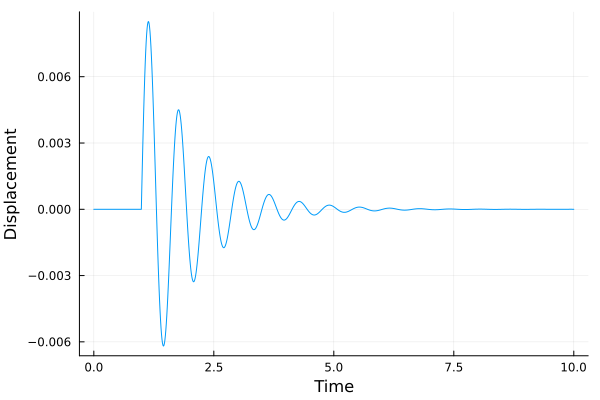

In [19]:
# Define system properties
m = 1.0   # mass
k = 100.0 # spring constant
c =2   # damping coefficient

# Define time step and duration
dt = 0.01     # time step
t_end = 10.0   # simulation duration
t = collect(0:dt:t_end)   # time array

# Define external force
F = zeros(length(t))   # initialize force array
F[100] = 9.8           # apply impulse at t=0

# Initialize displacement and velocity arrays
x = zeros(length(t))
v = zeros(length(t))

# Solve equation of motion using direct integration
for i = 2:length(t)
    # Calculate acceleration
    a = (F[i-1] - c*v[i-1] - k*x[i-1])/m
    
    # Update velocity and displacement
    v[i] = v[i-1] + a*dt
    x[i] = x[i-1] + v[i]*dt
end

# Plot displacement vs time
plot(t, x, xlabel="Time", ylabel="Displacement", legend=false)


## Impact Force using Laplace transformation

In the below case we changed our method of the One Point Mass Solution.
We used Laplace transformation on the code to solve the differential equation of motion. And, to do so, we expressed the differential equation in terms of the Laplace transform of the displacement, velocity, and external force.
We solved everyhting on paper and attached the solution below:


![Laplace Transformation image 1](images/laplace1.jpg)
![Laplace Transformation image 2](images/laplace2.jpg)
![Laplace Transformation image 3](images/laplace3.jpg)
![Laplace Transformation image 4](images/laplace4.jpg)
![Laplace Transformation image 5](images/laplace5.jpg)

In [6]:
# # Define system properties
# m = 1.0   # mass
# k = 100.0 # spring constant
# c = 2.0   # damping coefficient

# # Define time step and duration
# t_end = 10.0  # simulation duration
# tspan = (0.0, t_end)

# #Define external force
# function F(t)
#     if t >= 2.0 && t <= 4.0
#         return 10.0
#     else
#         return 0.0
#     end
# end

# # Define ODE system
# function vibrating_spring!(du, u, p, t)
#     x, v = u
#     F_t = F(t)
#     k = p[1]
#     c = p[2]
#     m = p[3]
#     du[1] = v
#     #F = ifelse(t >= 2.0, 4.0, 0.0)
#     du[2] = (F_t - k*x - c*v) / m
# end

# # Initial conditions
# u0 = [0.0, 0.0]

# # Parameters
# p = [k, c, m]

# # Solve ODE system
# prob = ODEProblem(vibrating_spring!, u0, tspan, p)
# sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# # Plot results
# plot(sol, xlabel="Time", ylabel="Displacement", label="Displacement", legend=:topleft)


In [7]:
# # Define system properties
# m = 1.0   # mass
# k = 100.0 # spring constant
# c = 2.0   # damping coefficient

# # Define natural frequency and time step
# wn = sqrt(k/m)    # natural frequency
# dt = 0.01         # time step

# # Define time span and external force
# tspan = (0.0, 10.0)
# t = collect(tspan[1]:dt:tspan[2])
# F = 10.0*sin.(2*wn*t)   # impact force at 2 times natural frequency

# # Define initial conditions
# x0 = 0.0
# v0 = 0.0

# # Define ODE function
# function vibrating_mass!(du, u, p, t)
#     x, v = u
#     k, c, m = p
#     du[1] = v
#     du[2] = (F[findfirst(isequal(t),t)] - k*x - c*v) / m
# end

# # Define ODE problem
# prob = ODEProblem(vibrating_mass!, [x0, v0], tspan, [k, c, m])

# # Solve ODE problem
# sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# # Plot results
# using Plots
# plot(sol.t, sol[1,:], xlabel="Time", ylabel="Displacement", legend=false)


## Vibration Force
- What about vibration force at driving frequency different from natural frequency?
- What about vibration force at driving frequency equal to natural frequency? 
- Repeat analysis for impact force using DifferentialEquations? 


The following code solves an ordinary differential equation system that describes the motion of a vibrating door subjected to a sinusoidal force. The function vibrating_door! defines the system of equations, with the position, velocity, and force as inputs, and the parameters k, c, and m defining the properties of the door. The initial conditions, parameters, and time span are defined, and the ODE system is solved using the solve function from the DifferentialEquations library. Finally, the results are plotted using the Plots library, showing the position and velocity of the door over time.



This case represents an vibrational force.


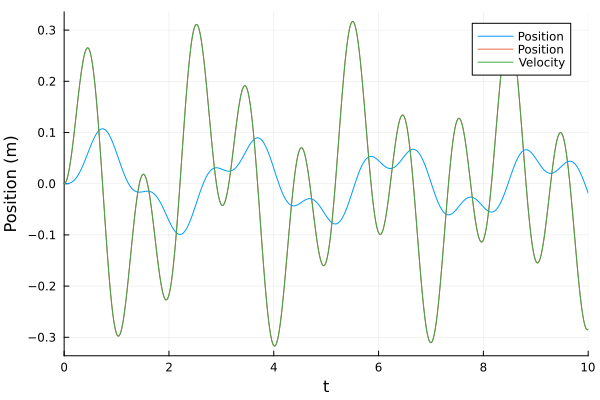

In [22]:
function vibrating_door_1!(du,u,p,t)
    x, v = u
    F = 10sin(2π*t) # Sinusoidal force
    k = p[1]
    c = p[2]
    m = p[3]
    du[1] = v
    du[2] = (F - k*x - c*v) / m
end

# Initial conditions
u0 = [0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
c = 1   # damping coefficient
m = 10  # mass
p = [k, c, m]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
prob = ODEProblem(vibrating_door_1!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# Plot results
# plot(sol, xlabel="Time", ylabel="Position", label="Position")
# plot!(sol, idxs=2, label="Velocity")
plot(sol, xlabel="Time", ylabel="Position (m)", label="Position")
plot!(sol, idxs=2, label="Velocity")


### Driving frequency equal to Natural frequency 

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


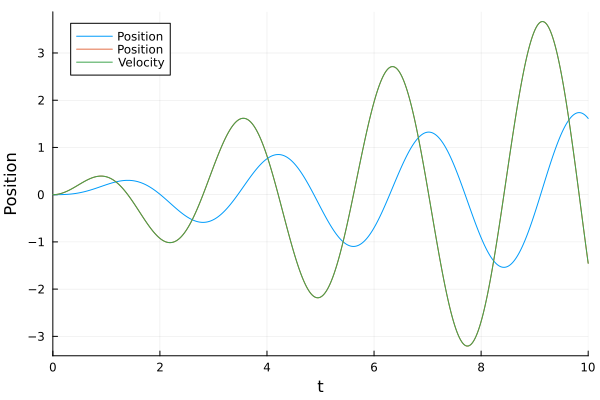

In [12]:
function vibrating_door_nf!(du,u,p,t)
    x, v = u
    ω = sqrt(p[1] / p[3])  # natural frequency
    F = 10sin(ω*t)  # sinusoidal force at natural frequency
    k = p[1]
    c = p[2]
    m = p[3]
    du[1] = v
    du[2] = (F - k*x - c*v) / m
end

# Initial conditions
u0 = [0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
c = 1   # damping coefficient
m = 10  # mass
p = [k, c, m]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
prob = ODEProblem(vibrating_door_nf!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# Plot results
plot(sol, xlabel="Time", label="Position", ylabel="Position")
plot!(sol, vars=(2), label="Velocity")


### Driving frequency different from natural frequency 

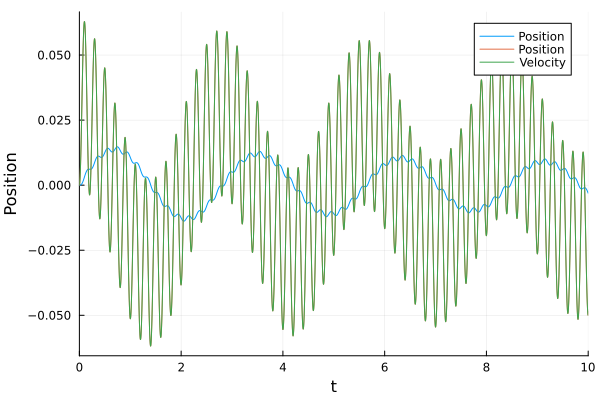

In [13]:
function vibrating_door_1_not_nf!(du,u,p,t)
    x, v = u
    F = 10sin(2π*5*t) # Sinusoidal force at 5 Hz
    k = p[1]
    c = p[2]
    m = p[3]
    du[1] = v
    du[2] = (F - k*x - c*v) / m
end

# Initial conditions
u0 = [0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
c = 1   # damping coefficient
m = 10  # mass
p = [k, c, m]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
prob = ODEProblem(vibrating_door_1_not_nf!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# Plot results
plot(sol, xlabel="Time", label="Position", ylabel="Position")
plot!(sol, vars=(2), label="Velocity")


# <strong> Two Point Mass </strong> 

## Impact Force

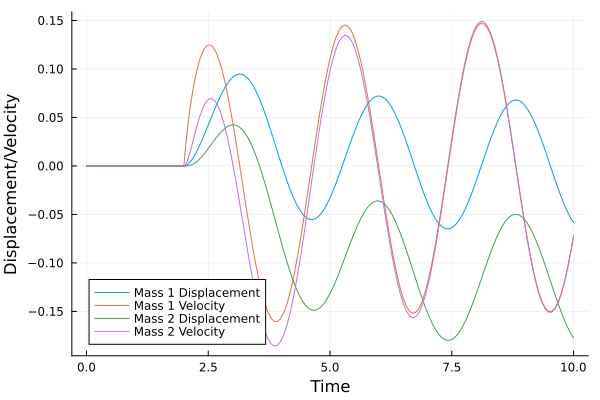

In [14]:
function impacting_door_2!(du,u,p,t)
    x1 = u[1]
    x2 = u[2]
    v1 = u[3]
    v2 = u[4]
    k = p[1]
    c = p[2]
    m1 = p[3]
    m2 = p[4]
    ω₀ = p[5]
    F = ifelse(t >= 2.0, 6.0, 0.0) # Impulse force at t = 2.0 seconds
    du[1] = v1
    du[2] = v2
    du[3] = (F - k*(x1 - x2) - c*(v1 - v2) - m1*ω₀^2*x1) / m1
    du[4] = (-k*(x1 - x2) - c*(v2 - v1) - m2*ω₀^2*x2) / m2
end

# Initial conditions
u0 = [0.0, 0.0, 0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
m1 = 10  # mass 1
m2 = 10  # mass 2
ω₀ = sqrt(k/m1)  # natural frequency
c = 2*m1*ω₀  # critical damping coefficient
p = [k, c, m1, m2, ω₀]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
sol = solve(ODEProblem(impacting_door_2!, u0, tspan, p), Tsit5(), reltol=1e-8, abstol=1e-8)

# Extract displacement and velocity components of the solution
x1 = [sol[i][1] for i in 1:length(sol)]
x2 = [sol[i][2] for i in 1:length(sol)]
v1 = [sol[i][3] for i in 1:length(sol)]
v2 = [sol[i][4] for i in 1:length(sol)]

# Plot results
plot(sol.t, x1, xlabel="Time", ylabel="Displacement/Velocity", label="Mass 1 Displacement")
plot!(sol.t, v1, label="Mass 1 Velocity")
plot!(sol.t, x2, label="Mass 2 Displacement")
plot!(sol.t, v2, label="Mass 2 Velocity")


## Vibration Force
Why is an external force applied to mass $m_1$?

An external force is applied to mass $m_1$ because it is located close to a wall or some other constraint that prevents it from moving freely. In order to move the mass, an external force must be applied to overcome the constraint.

How does mass $m_2$ respond to the force applied on $m_1$?

When an external force is applied to mass $m_1$, it starts vibrating and collides with mass $m_2$, causing it to also start vibrating. This is an example of internal vibrational force, where the vibrations of one mass cause vibrations in another mass that is connected to it. The harmonic motion in mass $m_2$ is less than that in $m_1$ because of the stiffness in $m_2, which resists changes in its vibration.

What is the role of the term $m_1 , \omega_0^2 , x_1$ in the given equation?

In the given equation, the term $m_1 , \omega_0^2 , x_1$ represents the restoring force due to the mass’s own inertia. It is proportional to the displacement of mass $m_1$ from its equilibrium position ($x_1$) and is multiplied by the square of the natural frequency of the system ($\omega_0^2$). This term represents the tendency of the mass to return to its equilibrium position when displaced, and is an important factor in determining the behavior of the system as a whole. The other terms in the equation represent external driving forces, damping forces, and spring forces that also influence the motion of the masses.

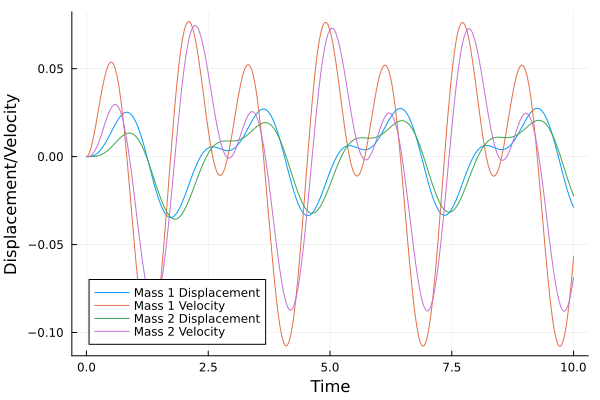

In [18]:

function vibrating_door_2!(du,u,p,t)
    x1 = u[1]
    x2 = u[2]
    v1 = u[3]
    v2 = u[4]
    k = p[1]
    c = p[2]
    m1 = p[3]
    m2 = p[4]
    ω₀ = p[5]
    F = 3*sin(2*ω₀*t) # Sinusoidal force
    du[1] = v1
    du[2] = v2
    du[3] = (F - k*(x1 - x2) - c*(v1 - v2) - m1*ω₀^2*x1) / m1
    du[4] = (-k*(x1 - x2) - c*(v2 - v1) - m2*ω₀^2*x2) / m2
end

# Initial conditions
u0 = [0.0, 0.0, 0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
m1 = 10  # mass 1
m2 = 10  # mass 2
ω₀ = sqrt(k/m1)  # natural frequency
c = 2*m1*ω₀  # critical damping coefficient
p = [k, c, m1, m2, ω₀]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
sol = solve(ODEProblem(vibrating_door_2!, u0, tspan, p), Tsit5(), reltol=1e-8, abstol=1e-8)

# Extract displacement and velocity components of the solution
x1 = [sol[i][1] for i in 1:length(sol)]
x2 = [sol[i][2] for i in 1:length(sol)]
v1 = [sol[i][3] for i in 1:length(sol)]
v2 = [sol[i][4] for i in 1:length(sol)]

# Plot results
plot(sol.t, x1, xlabel="Time", ylabel="Displacement/Velocity", label="Mass 1 Displacement")
plot!(sol.t, v1, label="Mass 1 Velocity")
plot!(sol.t, x2, label="Mass 2 Displacement")
plot!(sol.t, v2, label="Mass 2 Velocity")


# <strong> Three point masses </strong>

## Impact Force

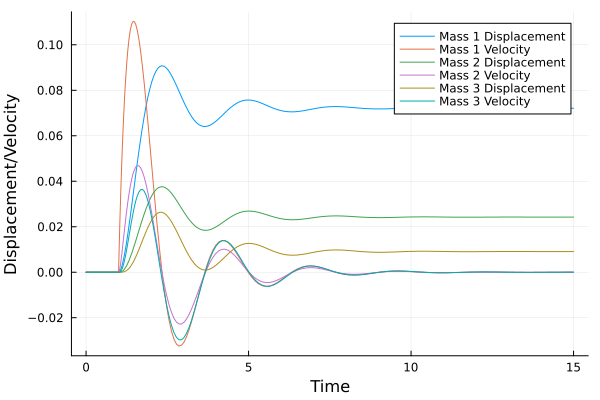

In [4]:
function impacting_door_3!(du,u,p,t)
    x1 = u[1]
    x2 = u[2]
    x3 = u[3]
    v1 = u[4]
    v2 = u[5]
    v3 = u[6]
    k1 = p[1]
    k2 = p[2]
    k3 = p[3]
    c1 = p[4]
    c2 = p[5]
    c3 = p[6]
    m1 = p[7]
    m2 = p[8]
    m3 = p[9]
    ω₀ = p[10]
    F = ifelse(t >= 1.0, 6.0, 0.0) # Impulse force at t = 2.0 seconds
    du[1] = v1
    du[2] = v2
    du[3] = v3
    du[4] = (F - k1*(x1 - x2) - c1*(v1 - v2) - m1*ω₀^2*x1) / m1
    du[5] = (-k1*(x2 - x1) - k2*(x2 - x3) - k3*(x2) - c1*(v2 - v1) - c2*(v2 - v3) - c3*v2 - m2*ω₀^2*x2) / m2
    du[6] = (-k2*(x3 - x2) - c2*(v3 - v2) - m3*ω₀^2*x3) / m3
end

# Initial conditions
u0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # initial position and velocity

# Parameters
k1 = 50  # spring constant 1
k2 = 30  # spring constant 2
k3 = 30  # spring constant 2
m1 = 10  # mass 1
m2 = 10  # mass 2
m3 = 10  # mass 3
ω₀ = sqrt(k1/m1)  # natural frequency
c1 = 2*m1*ω₀  # critical damping coefficient 1
c2 = 2*m2*ω₀  # critical damping coefficient 2
c3 = 2*m2*ω₀  # critical damping coefficient 2
p = [k1, k2, k3, c1, c2, c3, m1, m2, m3, ω₀]
# Time span
tspan = (0.0, 15.0)  # 10 seconds of simulation time

# Solve ODE system
sol = solve(ODEProblem(impacting_door_3!, u0, tspan, p), Tsit5(), reltol=1e-8, abstol=1e-8)

# Extract displacement and velocity components of the solution
x1 = [sol[i][1] for i in 1:length(sol)]
x2 = [sol[i][2] for i in 1:length(sol)]
x3 = [sol[i][3] for i in 1:length(sol)]
v1 = [sol[i][4] for i in 1:length(sol)]
v2 = [sol[i][5] for i in 1:length(sol)]
v3 = [sol[i][6] for i in 1:length(sol)]

# Plot results
plot(sol.t, x1, xlabel="Time", ylabel="Displacement/Velocity", label="Mass 1 Displacement")
plot!(sol.t, v1, label="Mass 1 Velocity")
plot!(sol.t, x2, label="Mass 2 Displacement")
plot!(sol.t, v2, label="Mass 2 Velocity")
plot!(sol.t, x3, label="Mass 3 Displacement")
plot!(sol.t, v3, label="Mass 3 Velocity")



## Vibration Force
To represent vibrational force 


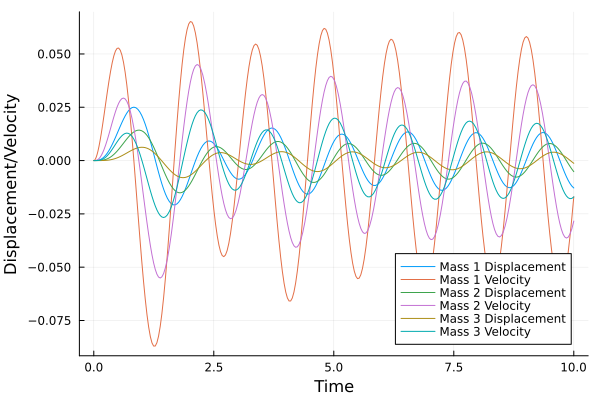

In [5]:
using DifferentialEquations, Plots

function vibrating_door_3!(du,u,p,t)
    x1 = u[1]
    x2 = u[2]
    x3 = u[3]
    v1 = u[4]
    v2 = u[5]
    v3 = u[6]
    k1 = p[1]
    k2 = p[2]
    k3 = p[3]
    c1 = p[4]
    c2 = p[5]
    c3 = p[6]
    m1 = p[7]
    m2 = p[8]
    m3 = p[9]
    ω₀ = p[10]
    F = 3*sin(2*ω₀*t) # Sinusoidal force
    du[1] = v1
    du[2] = v2
    du[3] = v3
    du[4] = (F - k1*(x1 - x2) - c1*(v1 - v2) - m1*ω₀^2*x1) / m1
    du[5] = (-k1*(x2 - x1) - k2*(x2 - x3) - c1*(v2 - v1) - c2*(v2 - v3) - m2*ω₀^2*x2) / m2
    du[6] = (-k2*(x3 - x2) - c2*(v3 - v2) - k3*x3 - c3*v3 - m3*ω₀^2*x3) / m3
end

# Initial conditions
u0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # initial position and velocity

# Parameters
k1 = 50  # spring constant 1
k2 = 30  # spring constant 2
k3 = 30  # spring constant 3
m1 = 10  # mass 1
m2 = 10  # mass 2
m3 = 10  # mass 3
ω₀ = sqrt(k1/m1)  # natural frequency
c1 = 2*m1*ω₀  # critical damping coefficient 1
c2 = 2*m2*ω₀  # critical damping coefficient 2
c3 = 2*m3*ω₀  # critical damping coefficient 3
p = [k1, k2, k3, c1, c2, c3, m1, m2, m3, ω₀]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
sol = solve(ODEProblem(vibrating_door_3!, u0, tspan, p), Tsit5(), reltol=1e-8, abstol=1e-8)

# Extract displacement and velocity components of the solution
x1 = [sol[i][1] for i in 1:length(sol)]
x2 = [sol[i][2] for i in 1:length(sol)]
x3 = [sol[i][3] for i in 1:length(sol)]
v1 = [sol[i][4] for i in 1:length(sol)]
v2 = [sol[i][5] for i in 1:length(sol)]
v3 = [sol[i][6] for i in 1:length(sol)]

# Plot results
plot(sol.t, x1, xlabel="Time", ylabel="Displacement/Velocity", label="Mass 1 Displacement")
plot!(sol.t, v1, label="Mass 1 Velocity")
plot!(sol.t, x2, label="Mass 2 Displacement")
plot!(sol.t, v2, label="Mass 2 Velocity")
plot!(sol.t, x3, label="Mass 3 Displacement")
plot!(sol.t, v3, label="Mass 3 Velocity")



# <strong> Collision </strong>

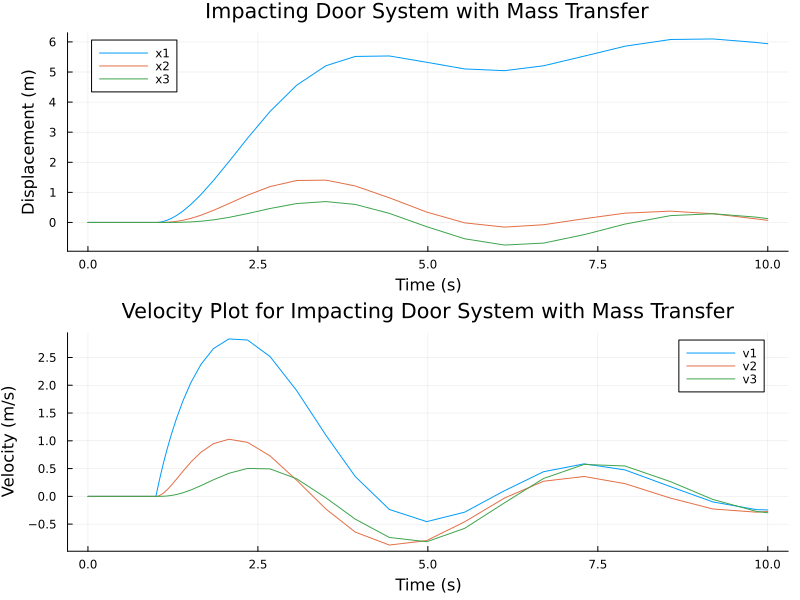

In [6]:
# Implementing mass transfer between the three masses
function impacting_door_3_mass_transfer!(du,u,p,t)
    impacting_door_3!(du,u,p,t)
    x1 = u[1]
    x2 = u[2]
    x3 = u[3]
    v1 = u[4]
    v2 = u[5]
    v3 = u[6]
    k1 = p[1]
    k2 = p[2]
    k3 = p[3]
    c1 = p[4]
    c2 = p[5]
    c3 = p[6]
    m1 = p[7]
    m2 = p[8]
    m3 = p[9]
    ω₀ = p[10]
    F = ifelse(t >= 1.0, 6.0, 0.0) # Impulse force at t = 2.0 seconds

    # Implement mass transfer
    du[4] += k1*(x1 - x2) / m1
    du[5] += k1*(x2 - x1) / m2
    du[5] += k2*(x2 - x3) / m2
    du[6] += k2*(x3 - x2) / m3
end

# Define initial conditions and parameter values
u0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] # [x1, x2, x3, v1, v2, v3]
p = [10.0, 5.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] # [k1, k2, k3, c1, c2, c3, m1, m2, m3, ω₀]

# Solve the system of differential equations
prob = ODEProblem(impacting_door_3_mass_transfer!, u0, (0.0, 10.0), p)
sol = solve(prob)

# Plot the solution
plot(sol.t, sol[1,:], label="x1")
plot!(sol.t, sol[2,:], label="x2")
plot!(sol.t, sol[3,:], label="x3")
xlabel!("Time (s)")
ylabel!("Displacement (m)")
title!("Impacting Door System with Mass Transfer")

# Define initial conditions and parameter values
u0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] # [x1, x2, x3, v1, v2, v3]
p = [10.0, 5.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] # [k1, k2, k3, c1, c2, c3, m1, m2, m3, ω₀]

# Solve the system of differential equations
prob = ODEProblem(impacting_door_3_mass_transfer!, u0, (0.0, 10.0), p)
sol = solve(prob)

# Plot the solution
p1 = plot(sol.t, sol[1,:], label="x1")
plot!(sol.t, sol[2,:], label="x2")
plot!(sol.t, sol[3,:], label="x3")
xlabel!("Time (s)")
ylabel!("Displacement (m)")
title!("Impacting Door System with Mass Transfer")

p2 = plot(sol.t, sol[4,:], label="v1")
plot!(sol.t, sol[5,:], label="v2")
plot!(sol.t, sol[6,:], label="v3")
xlabel!("Time (s)")
ylabel!("Velocity (m/s)")
title!("Velocity Plot for Impacting Door System with Mass Transfer")

plot(p1, p2, layout=(2,1), size=(800,600))


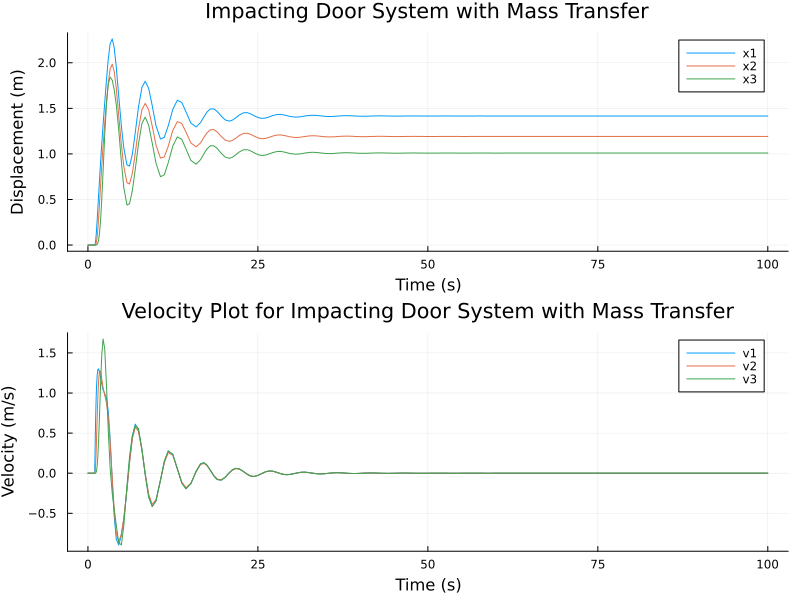

In [9]:
# Implementing mass transfer between the three masses
function impacting_door_3_mass_transfer!(du,u,p,t)
    impacting_door_3!(du,u,p,t)
    x1 = u[1]
    x2 = u[2]
    x3 = u[3]
    v1 = u[4]
    v2 = u[5]
    v3 = u[6]
    k1 = p[1]
    k2 = p[2]
    k3 = p[3]
    c1 = p[4]
    c2 = p[5]
    c3 = p[6]
    m1 = p[7]
    m2 = p[8]
    m3 = p[9]
    ω₀ = p[10]
    F = ifelse(t >= 1.0, 6.0, 0.0) # Impulse force at t = 2.0 seconds

    # Implement mass transfer
    du[4] -= k1*(x1 - x2) / m1 + k2*(x2 - x3) / m2
    du[5] += k1*(x1 - x2) / m2
    du[6] += k2*(x2 - x3) / m3
    du[4] += k3*(x1 - x3) / m1
    du[6] -= k3*(x1 - x3) / m3
end


# Define initial conditions and parameter values
u0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] # [x1, x2, x3, v1, v2, v3]
p = [10.0, 5.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] # [k1, k2, k3, c1, c2, c3, m1, m2, m3, ω₀]

# Solve the system of differential equations
prob = ODEProblem(impacting_door_3_mass_transfer!, u0, (0.0, 100.0), p)
sol = solve(prob)

# Plot the solution
p1 = plot(sol.t, sol[1,:], label="x1")
plot!(sol.t, sol[2,:], label="x2")
plot!(sol.t, sol[3,:], label="x3")
xlabel!("Time (s)")
ylabel!("Displacement (m)")
title!("Impacting Door System with Mass Transfer")

p2 = plot(sol.t, sol[4,:], label="v1")
plot!(sol.t, sol[5,:], label="v2")
plot!(sol.t, sol[6,:], label="v3")
xlabel!("Time (s)")
ylabel!("Velocity (m/s)")
title!("Velocity Plot for Impacting Door System with Mass Transfer")

plot(p1, p2, layout=(2,1), size=(800,600))
